## <span style="color:#a4d4a3">**Extended Kalman Filter (EKF) for SLAM**</span>


### 📖 <span style="color:#a4d4a3">**Definition of the SLAM Problem**</span>

<span style="color:#00703c">**Given:**</span>

- The robot's controls: $\quad u_{1:T} = \{u_1, u_2, u_3, \dots, u_T\} $
- Observations: $\quad z_{1:T} = \{z_1, z_2, z_3, \dots, z_T\} $

<span style="color:#00703c">**Wanted:**</span>

- A map of the environment: $\quad m $
- The path of the robot: $\quad x_{0:T} = \{x_0, x_1, x_2, \dots, x_T\} $

Typically, we aim to solve the <span style="color:#ffa500">**online SLAM problem**</span>, focusing specifically on estimating the <span style="color:#ffa500">**current state**</span> of the robot and <span style="color:#ffa500">**landmarks**</span> at each timestep.

---



### 🧭 <span style="color:#a4d4a3">**EKF for Online SLAM**</span>

We consider here the Kalman Filter as a solution to the online SLAM problem, representing the <span style="color:#ffa500">**belief**</span> as:

$$
p(x_t, m \mid z_{1:t}, u_{1:t})
$$

Our goal is to estimate the robot's pose and the locations of the landmarks in the environment <span style="color:#ffa500">**simultaneously**</span>.

<span style="color:#00703c">**Assumption:**</span>

- Known correspondences (data associations between landmarks and observations are known).

We define the state space for a robot moving in a 2D plane, observing $ N $ landmarks, as:

$$
x_t = (\underbrace{x, y, \theta}_{robot\,state}, \underbrace{m_{1,x}, m_{1,y}}_{landmark\,1}, \underbrace{m_{2,x}, m_{2,y}}_{landmark\,2}, \dots, \underbrace{m_{N,x}, m_{N,y}}_{landmark\,N})^T
$$




#### 📍 <span style="color:#a4d4a3">EKF SLAM: State Representation</span>

We have a map with $ N $ landmarks, resulting in a state vector of dimension $ 3 + 2N $.

The belief (state estimate and uncertainty) is represented by:

- <span style="color:#ffa500">**Mean vector**</span> $ \mu $ and <span style="color:#ffa500">**covariance matrix**</span> $ \Sigma $:
$$
\mu = 
\begin{pmatrix}
\color{#FFD93D} x \\
\color{#FFD93D} y \\
\color{#FFD93D} \theta \\
\color{#4D96FF} m_{1,x} \\ 
\color{#4D96FF} m_{1,y} \\
\color{#4D96FF} \vdots \\
\color{#4D96FF} m_{N,x} \\
\color{#4D96FF} m_{N,y}
\end{pmatrix}

\quad\quad

\Sigma =
\left(
\begin{array}{ccc:ccccc}
\color{#FFD93D} \sigma_{x,x} & \color{#FFD93D} \sigma_{x,y} & \color{#FFD93D} \sigma_{x,\theta} & \color{#6BCB77} \sigma_{x,m_{1,x}} & \color{#6BCB77} \sigma_{x,m_{1,y}} & \color{#6BCB77} \cdots & \color{#6BCB77} \sigma_{x,m_{N,x}} & \color{#6BCB77} \sigma_{x,m_{N,y}} \\
\color{#FFD93D} \sigma_{y,x} & \color{#FFD93D} \sigma_{y,y} & \color{#FFD93D} \sigma_{y,\theta} & \color{#6BCB77} \sigma_{y,m_{1,x}} & \color{#6BCB77} \sigma_{y,m_{1,y}} & \color{#6BCB77} \cdots & \color{#6BCB77} \sigma_{y,m_{N,x}} & \color{#6BCB77} \sigma_{y,m_{N,y}} \\
\color{#FFD93D} \sigma_{\theta,x} & \color{#FFD93D} \sigma_{\theta,y} & \color{#FFD93D} \sigma_{\theta,\theta} & \color{#6BCB77} \sigma_{\theta,m_{1,x}} & \color{#6BCB77} \sigma_{\theta,m_{1,y}} & \color{#6BCB77} \cdots & \color{#6BCB77} \sigma_{\theta,m_{N,x}} & \color{#6BCB77} \sigma_{\theta,m_{N,y}} \\
\hdashline
\color{#6BCB77} \sigma_{m_{1,x},x} & \color{#6BCB77} \sigma_{m_{1,x},y} & \color{#6BCB77} \sigma_{m_{1,x},\theta} & \color{#4D96FF} \sigma_{m_{1,x},m_{1,x}} & \color{#4D96FF} \sigma_{m_{1,x},m_{1,y}} & \color{#4D96FF} \cdots & \color{#4D96FF} \sigma_{m_{1,x},m_{N,x}} & \color{#4D96FF} \sigma_{m_{1,x},m_{N,y}} \\
\color{#6BCB77} \sigma_{m_{1,y},x} & \color{#6BCB77} \sigma_{m_{1,y},y} & \color{#6BCB77} \sigma_{m_{1,y},\theta} & \color{#4D96FF} \sigma_{m_{1,y},m_{1,x}} & \color{#4D96FF} \sigma_{m_{1,y},m_{1,y}} & \color{#4D96FF} \cdots & \color{#4D96FF} \sigma_{m_{1,y},m_{N,x}} & \color{#4D96FF} \sigma_{m_{1,y},m_{N,y}} \\
\color{#6BCB77} \vdots & \color{#6BCB77} \vdots & \color{#6BCB77} \vdots & \color{#4D96FF} \vdots & \color{#4D96FF} \vdots & \color{#4D96FF} \ddots & \color{#4D96FF} \vdots & \color{#4D96FF} \vdots \\
\color{#6BCB77} \sigma_{m_{N,x},x} & \color{#6BCB77} \sigma_{m_{N,x},y} & \color{#6BCB77} \sigma_{m_{N,x},\theta} & \color{#4D96FF} \sigma_{m_{N,x},m_{1,x}} & \color{#4D96FF} \sigma_{m_{N,x},m_{1,y}} & \color{#4D96FF} \cdots & \color{#4D96FF} \sigma_{m_{N,x},m_{N,x}} & \color{#4D96FF} \sigma_{m_{N,x},m_{N,y}} \\
\color{#6BCB77} \sigma_{m_{N,y},x} & \color{#6BCB77} \sigma_{m_{N,y},y} & \color{#6BCB77} \sigma_{m_{N,y},\theta} & \color{#4D96FF} \sigma_{m_{N,y},m_{1,x}} & \color{#4D96FF} \sigma_{m_{N,y},m_{1,y}} & \color{#4D96FF} \cdots & \color{#4D96FF} \sigma_{m_{N,y},m_{N,x}} & \color{#4D96FF} \sigma_{m_{N,y},m_{N,y}} \\
\end{array}
\right)
$$


In compact notation, the EKF SLAM state and covariance are represented as:
$\quad \mu = \begin{pmatrix}\color{#FFD93D} x \\ \color{#4D96FF} m\end{pmatrix}\quad\quad\Sigma = \begin{pmatrix}\color{#FFD93D} \Sigma_{xx} & \color{#6BCB77} \Sigma_{xm}\\\color{#6BCB77} \Sigma_{mx} & \color{#4D96FF} \Sigma_{mm}\end{pmatrix}$

> 📝 <span style="color:#0098ff">**Note:**</span> <em> In practice, we can start with only the robot's state and dynamically grow the matrix as landmarks are discovered.</em>


#### ♻️ <span style="color:#a4d4a3">EKF SLAM: Filter Cycle</span>

The EKF SLAM algorithm operates in cycles consisting of five steps:

```js
1. State Prediction 
2. Observation Prediction 
3. Measurement 
4. Data Association 
5. Update (Correction)
```

---


#### 🔎 <span style="color:#a4d4a3">EKF SLAM: State Prediction</span>

In the <span style="color:#ffa500">**prediction step**</span>, only the robot's pose ($x, y, \theta$) is directly affected by the control inputs $u_t$, while landmark positions remain unchanged.

Thus, the covariance update is computationally efficient, with <span style="color:#ffa500">**linear complexity**</span> in the number of landmarks $ N $:

$$
\begin{pmatrix}
\color{#6BCB77} x_R \\ m_1 \\ \vdots \\ m_N
\end{pmatrix},
\quad
\Sigma = 
\begin{pmatrix}
\color{#6BCB77}  \Sigma_{x_Rx_R} & \color{#6BCB77} \Sigma_{x_Rm_1} & \color{#6BCB77} \dots & \color{#6BCB77} \Sigma_{x_Rm_N}\\[6pt]
\color{#6BCB77} \Sigma_{m_1x_R} & \Sigma_{m_1m_1} & \dots & \Sigma_{m_1m_N}\\[6pt]
\color{#6BCB77} \vdots & \vdots & \ddots & \vdots \\[6pt]
\color{#6BCB77} \Sigma_{m_Nx_R} & \Sigma_{m_Nm_1} & \dots & \Sigma_{m_Nm_N}
\end{pmatrix}
$$

#### 🛠️ <span style="color:#a4d4a3">EKF SLAM: Update Step</span>

In the <span style="color:#ffa500">**update step**</span>, both the robot's pose and landmark positions are updated based on new sensor measurements. Every landmark that the robot observes leads to updates in the state estimate, affecting both the <span style="color:#ffa500">**robot pose**</span> and the <span style="color:#ffa500">**landmark locations**</span>. 

Unlike the prediction step, this step involves updating the entire covariance matrix due to the correlation between landmarks and the robot pose, resulting in a computational complexity that's <span style="color:#ffa500">**quadratic**</span> in the number of landmarks $ N $:

$$
\begin{pmatrix}
\color{#6BCB77} x_R \\[4pt]
\color{#6BCB77} m_1 \\[4pt]
\color{#6BCB77} \vdots \\[4pt]
\color{#6BCB77} m_N
\end{pmatrix},
\quad
\Sigma = 
\begin{pmatrix}
\color{#6BCB77} \Sigma_{x_Rx_R} & \color{#6BCB77} \Sigma_{x_Rm_1} & \color{#6BCB77} \dots & \color{#6BCB77} \Sigma_{x_Rm_N}\\[6pt]
\color{#6BCB77} \Sigma_{m_1x_R} & \color{#6BCB77} \Sigma_{m_1m_1} & \color{#6BCB77} \dots & \color{#6BCB77} \Sigma_{m_1m_N}\\[6pt]
\color{#6BCB77} \vdots & \color{#6BCB77} \vdots & \color{#6BCB77} \ddots & \color{#6BCB77} \vdots \\[6pt]
\color{#6BCB77} \Sigma_{m_Nx_R} & \color{#6BCB77} \Sigma_{m_Nm_1} & \color{#6BCB77} \dots & \color{#6BCB77} \Sigma_{m_Nm_N}
\end{pmatrix}
$$

> 📝 <span style="color:#0098ff">**Note:**</span> <em> The reason for quadratic complexity is that observing a landmark refines not only that landmark's position but also improves the estimates for the robot pose and other landmarks via correlations encoded in the covariance matrix. </em>

---

### 👩‍💻 <span style="color:#a4d4a3">**EKF SLAM: Complete Example +**</span> `Python implementation`


#### <span style="color:#a4d4a3">**1. Initialization**</span>


- Initially, the robot starts in its <span style="color:#ffa500">**own reference frame**</span>, and the landmarks are <span style="color:#ffa500">**unknown**</span>.
- The state vector has dimensions $2N + 3$.

$$
\mu_0 = (0, 0, 0, \dots, 0)^T
$$

$$
\Sigma_0 = 
\begin{pmatrix}
0 & 0 & 0 & 0 & \dots & 0 \\
0 & 0 & 0 & 0 & \dots & 0 \\
0 & 0 & 0 & 0 & \dots & 0 \\
0 & 0 & 0 & \infty & \dots & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & \dots & \infty
\end{pmatrix}
$$

> 📝 <span style="color:#0098ff">**Note:**</span> <em> In reality, landmarks are initialized as they are first observed, updating and expanding the state representation on-the-fly. </em>


#### <span style="color:#a4d4a3">**2. Prediction Step** (Motion Model)</span>

<span style="color:#ffa500">**Goal:**</span> Update the robot’s state based on its motion.

Assuming a velocity-based model, the robot's motion in the 2D plane can be expressed as:

$$
\begin{pmatrix}
x' \\ y' \\ \theta'
\end{pmatrix} 
=
\begin{pmatrix}
x \\ y \\ \theta
\end{pmatrix}
+
\begin{pmatrix}
-\frac{v_t}{w_t}\sin(\theta) + \frac{v_t}{w_t}\sin(\theta + w_t\Delta t) \\[6pt]
\frac{v_t}{w_t}\cos(\theta) - \frac{v_t}{w_t}\cos(\theta + w_t\Delta t) \\[6pt]
w_t\Delta t
\end{pmatrix}
$$

To map this into the full state space ($2N+3$ dimensions), we define an auxiliary matrix $F_x^T$:


$$
\begin{aligned}
\begin{pmatrix}
x' \\ y' \\ \theta' \\ \vdots
\end{pmatrix} 
&=
\begin{pmatrix}
x \\ y \\ \theta \\ \vdots
\end{pmatrix}
+

\underbrace{
\begin{pmatrix}
1 & 0 & 0 & 0 \, \ldots \, 0 \\
0 & 1 & 0 & 0 \, \ldots \, 0 \\
0 & 0 & 1 & \underbrace{0 \, \ldots \, 0}_{2\,N\,cols} \\
\end{pmatrix}^T}_{F_x^T}

\begin{pmatrix}
-\frac{v_t}{w_t}\sin(\theta) + \frac{v_t}{w_t}\sin(\theta + w_t\Delta t) \\[6pt]
\frac{v_t}{w_t}\cos(\theta) - \frac{v_t}{w_t}\cos(\theta + w_t\Delta t) \\[6pt]
w_t\Delta t
\end{pmatrix} \\ \\
&=
\underbrace{
\begin{pmatrix}
x \\ y \\ \theta \\ \vdots
\end{pmatrix}
+ F_x^T
\begin{pmatrix}
-\frac{v_t}{w_t}\sin(\theta) + \frac{v_t}{w_t}\sin(\theta + w_t\Delta t) \\[6pt]
\frac{v_t}{w_t}\cos(\theta) - \frac{v_t}{w_t}\cos(\theta + w_t\Delta t) \\[6pt]
w_t\Delta t
\end{pmatrix}}_{g(u_t,x_t)}
\end{aligned}
$$

Thus, our <span style="color:#ffa500">**predicted state**</span> is:

$$
\bar{\mu}_t = g(u_t, \mu_{t-1})
$$

We can define two functions: one for constructing the auxiliary matrix (<span style="color:#6BCB77"><tt>Fx_embed</tt></span>) and another for computing the motion increment (<span style="color:#6BCB77"><tt>motion_increment</tt></span>):

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- Auxiliary matrix ---
def Fx_embed(n:int) -> np.ndarray:
    """
    Create the auxiliary matrix Fx to embed 3x3 matrices into 
    the top-left corner of nxn matrices.
    Args:
    - n (int): size of the full state (robot + landmarks)
    Returns:
    - Fx (np.ndarray): 3x3 identity matrix embedded in the top-left corner of a 3xn matrix
    """
    Fx = np.zeros((3, n))
    Fx[:3,:3] = np.eye(3)
    return Fx

# --- Incremental motion model ---
def motion_increment(theta:float, u:np.ndarray, dt:float) -> np.ndarray:
    """
    Compute the incremental motion given the current state, control input, and time step.
    Args:
    - theta (float): current orientation of the robot
    - u (np.ndarray): control input (v, w) where v is linear velocity and w is angular velocity
    - dt (float): time step 
    Returns:
    - inc (np.ndarray): incremental motion as a numpy array [dx, dy, dtheta]
    """
    v, w = u
    # Handle straight line case
    if abs(w) < 1e-9:
        inc = np.array([
            v * dt * np.cos(theta),
            v * dt * np.sin(theta),
            0.0
        ])
        return inc
    # General case
    th2 = theta + w*dt
    inc = np.array([
        -(v/w)*np.sin(theta) + (v/w)*np.sin(th2),
        (v/w)*np.cos(theta) - (v/w)*np.cos(th2),
        w*dt
    ])
    return inc


#### <span style="color:#a4d4a3">**3. Covariance Prediction** (Motion Model)</span>

Next, we update the <span style="color:#ffa500">**covariance matrix**</span> as follows:

$$
\bar{\Sigma}_t = G_t \Sigma_{t-1} G_t^T + R_t
$$

Since the motion model $g$ only affects the robot pose, the Jacobian matrix $G_t$ has a particular block structure:

$$
G_t = 
\begin{pmatrix}
G_{t}^{x} & 0 \\[6pt]
0 & I
\end{pmatrix}
$$

- $ G_{t}^{x} $ is the 3×3 <span style="color:#ffa500">**Jacobian**</span> of the robot’s motion model.
- $ I $ is the identity matrix (size $2N\times2N$), indicating landmarks <span style="color:#ffa500">**remain unchanged**</span>.

<span style="color:#a4d4a3">**Jacobian of the Motion Model:**</span>

$$
\begin{aligned}
G_{t}^{x} 
&= 
\frac{\partial}{\partial(x,y,\theta)^T}
\begin{bmatrix}
\begin{pmatrix}
x \\ y \\ \theta
\end{pmatrix}
+
\begin{pmatrix}
-\frac{v_t}{w_t}\sin(\theta) + \frac{v_t}{w_t}\sin(\theta + w_t\Delta t)\\[6pt]
\frac{v_t}{w_t}\cos(\theta) - \frac{v_t}{w_t}\cos(\theta + w_t\Delta t)\\[6pt]
w_t\Delta t
\end{pmatrix}
\end{bmatrix} \\ \\ 
&= I +
\frac{\partial}{\partial(x,y,\theta)^T}
\begin{pmatrix}
-\frac{v_t}{w_t}\sin(\theta) + \frac{v_t}{w_t}\sin(\theta + w_t\Delta t)\\[6pt]
\frac{v_t}{w_t}\cos(\theta) - \frac{v_t}{w_t}\cos(\theta + w_t\Delta t)\\[6pt]
w_t\Delta t
\end{pmatrix}\\ \\
&= I +
\begin{pmatrix}
0 & 0 & -\frac{v_t}{w_t}\cos(\theta) + \frac{v_t}{w_t}\cos(\theta + w_t\Delta t)\\[6pt]
0 & 0 & -\frac{v_t}{w_t}\sin(\theta) + \frac{v_t}{w_t}\sin(\theta + w_t\Delta t)\\[6pt]
0 & 0 & 0
\end{pmatrix}\\ \\
&=
\begin{pmatrix}
1 & 0 & -\frac{v_t}{w_t}\cos(\theta) + \frac{v_t}{w_t}\cos(\theta + w_t\Delta t)\\[6pt]
0 & 1 & -\frac{v_t}{w_t}\sin(\theta) + \frac{v_t}{w_t}\sin(\theta + w_t\Delta t)\\[6pt]
0 & 0 & 1
\end{pmatrix}
\end{aligned} 
$$

The inner Jacobian can be implemented as a function like the one below (<span style="color:#6BCB77"><tt>G_inner</tt></span>). Remember that the identity matrix $I$ must be added afterwards (or included directly in the function, depending on your implementation choice).

In [20]:
# --- Inner Jacobian of motion model ---
def G_inner(theta:float, u:np.ndarray, dt:float) -> np.ndarray:
    """
    Compute the inner Jacobian of the motion model with respect to the state.
    Args:
    - theta (float): current orientation of the robot
    - u (np.ndarray): control input (v, w) where v is linear velocity and w is angular velocity
    - dt (float): time step
    Returns:
    - J (np.ndarray): 3x3 Jacobian matrix
    """
    v, w = u
    J = np.zeros((3,3))
    # Handle straight line case
    if abs(w) < 1e-9:
        J[0,2] = -v*np.sin(theta)*dt
        J[1,2] =  v*np.cos(theta)*dt
        return J
    # General case
    th2 = theta + w*dt
    J[0,2] = -(v/w)*np.cos(theta) + (v/w)*np.cos(th2)
    J[1,2] = -(v/w)*np.sin(theta) + (v/w)*np.sin(th2)
    return J

Evaluating the Jacobian gives us a concrete expression to be used in the <span style="color:#ffa500">**covariance update**</span>:

$$
\begin{aligned}
\bar{\Sigma}_t 
&= G_t \Sigma_{t-1} G_t^T + R_t\quad \\ \\
&=
\begin{pmatrix}
G_t^x & 0 \\
0 & I 
\end{pmatrix}
\begin{pmatrix}
\Sigma_{xx} & \Sigma_{xm} \\
\Sigma_{mx} & \Sigma_{mm}
\end{pmatrix}
\begin{pmatrix}
(G_t^x)^T & 0 \\
0 & I 
\end{pmatrix}
+ R_t \\ \\
&=
\begin{pmatrix}
G_{t}^{x}\Sigma_{xx}(G_{t}^{x})^T & G_{t}^{x}\Sigma_{xm}\\[6pt]
\Sigma_{mx}(G_{t}^{x})^T & \Sigma_{mm}
\end{pmatrix}
+ R_t
\end{aligned}
$$

We can clearly notice which parts change and which do not.
- The original uncertainty in the robot's pose $\Sigma_{xx}$ is updated based on $G_t^x$.
- The correlation between the robot's pose and the landmarks $\Sigma_{xm}, \Sigma_{mx}$ are also updated based on $G_t^x$.
- The landmarks' correlation $\Sigma_{mm}$ remains unchanged.

Putting it all together, the covariance update becomes:

In [21]:
# --- Covariance update ---
def covariance_update(Sigma_prev:np.ndarray, G_t:np.ndarray, R_t:np.ndarray) -> np.ndarray:
    """
    Update the covariance matrix using the motion model Jacobian and process noise.
    Args:
    - Sigma_prev (np.ndarray): previous covariance matrix
    - G_t (np.ndarray): motion model Jacobian matrix
    - R_t (np.ndarray): process noise covariance matrix
    Returns:
    - Sigma_new (np.ndarray): updated covariance matrix
    """
    return G_t @ Sigma_prev @ G_t.T + R_t

> 📝 <span style="color:#0098ff">**Note**:</span> <em>In practice, it is inefficient to update the entire covariance matrix as one single block. The landmark covariance $\Sigma_{mm}$ constitutes the largest part and remains unchanged during the prediction step. Updating it unnecessarily results in increased computational complexity. Therefore, implementations commonly exploit the sparse structure to update only relevant sub-blocks, significantly reducing computational burden.</em>

Bringing all components together, the mean and covariance prediction can now be written as:

In [22]:
# --- Angle wrapping (helper function) ---
def wrap_angle(a:float) -> float:
    """
    Wrap angle to [-pi, pi)
    Args:
    - a (float): angle in radians
    Returns:
    - (float) wrapped angle in radians within [-pi, pi)
    """
    return (a + np.pi) % (2*np.pi) - np.pi

# --- EKF SLAM Prediction Step ---
def EKF_SLAM_Prediction(mu_prev:np.ndarray, Sigma_prev:np.ndarray, u_t:np.ndarray, R_x:np.ndarray, dt:float) -> tuple:
    """
    Perform the EKF SLAM prediction step.
    Args:
    - mu_prev (np.ndarray): previous mean state vector (robot pose + landmarks)
    - Sigma_prev (np.ndarray): previous covariance matrix
    - u_t (np.ndarray): control input (v, w)
    - R_x (np.ndarray): process noise covariance matrix for the robot pose
    - dt (float): time step
    Returns:
    - mu_bar (np.array): predicted mean state vector (robot pose + landmarks)
    - Sigma_bar (np.ndarray): predicted covariance matrix
    """
    n = mu_prev.size
    Fx = Fx_embed(n)
    # Compute motion increment
    inc = motion_increment(mu_prev[2], u_t, dt)
    # Predict mean
    mu_bar = mu_prev.copy()
    mu_bar[:3] = mu_prev[:3] + inc
    mu_bar[2] = wrap_angle(mu_bar[2])
    # Compute covariance
    Gt = np.eye(n) + Fx.T @ G_inner(mu_prev[2], u_t, dt) @ Fx
    Rt = Fx.T @ R_x @ Fx
    # Predict covariance
    Sigma_bar = covariance_update(Sigma_prev, Gt, Rt)
    return mu_bar, Sigma_bar

With this step, we have completed the prediction cycle of EKF-SLAM. 

To see it in action, we now apply the above functions to a simple example, demonstrating how the mean and covariance evolve during a circular trajectory.

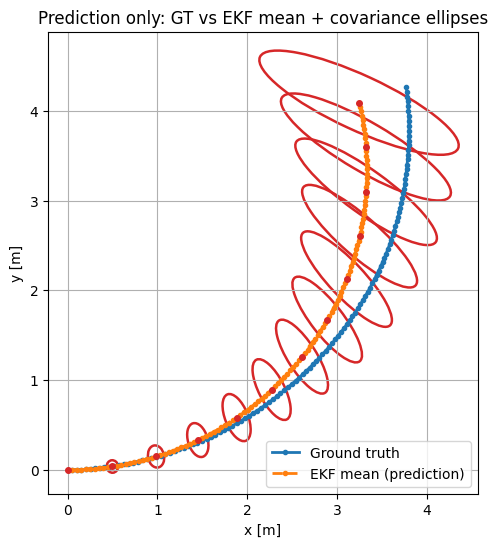

In [30]:
from types import SimpleNamespace
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# --- Plot utility: 2D covariance ellipse (x,y block) ---
def plot_ellipse(ax:plt.Axes, m:np.ndarray, P:np.ndarray, nsig:int = 2, **kwargs) -> None:
    """
    Draw a nsig-sigma ellipse for the (x,y) marginal of a 3x3 pose covariance.
    Args:
    - ax (plt.Axes): the axes to draw on.
    - m (np.ndarray): (3,) pose mean [x, y, theta]
    - P (np.ndarray): (3,3) pose covariance
    - nsig (int): number of standard deviations for the ellipse (default 2)
    - kwargs: additional keyword arguments passed to Ellipse patch
    """
    C = P[:2, :2]
    # Eigen-decomposition (sorted)
    S, U = np.linalg.eigh(C)
    order = S.argsort()[::-1]
    S, U = S[order], U[:, order]
    # Clamp tiny negative due to num. round-off
    S = np.clip(S, 0.0, None)
    a, b = nsig * np.sqrt(S)  # ellipse semi-axes
    ang = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    ax.add_patch(Ellipse(xy=m[:2], width=2*a, height=2*b, angle=ang, fill=False, **kwargs))


# --- Configuration ---   
cfg = SimpleNamespace(
    seed        = 1,                          # set to None for nondeterministic runs
    dt          = 0.10,                       # time step [s]
    T           = 120,                        # number of steps
    u_nom       = np.array([0.50, 0.15]),     # nominal [v, w] used by EKF for prediction
    bias_v      = 1.07,                       # GT speed bias multiplier
    bias_w      = 0.90,                       # GT turn-rate bias multiplier
    R_exec      = np.diag([0.02**2,           # GT control noise on [v, w]
                        (2.0*np.pi/180)**2]),  
    R_x         = np.diag([0.01**2, 0.01**2,  # EKF process noise on [x, y, theta]
                        (1.0*np.pi/180)**2]),  
    mu0         = np.zeros(3),                # initial pose mean
    Sigma0      = np.diag([0, 0, 0]),         # initial pose covariance
    ellipse_steps = np.arange(0, 121, 10)     # which steps to draw ellipses; None -> auto
)

# --- Prediction-only rollout ---
def run_prediction_only(cfg:SimpleNamespace) -> tuple:
    """
    Runs a prediction-only rollout:
    - Ground truth (GT) executes biased + noisy controls.
    - EKF predicts using nominal controls and inflates covariance with R_x.
    Args:
    - cfg (SimpleNamespace): configuration namespace (see above)
    Returns:
    - MU (np.ndarray): EKF pose means over time.
    - Sigma_hist (list): EKF pose covariances over time (length T+1).
    - GT (np.ndarray): Ground-truth poses over time.
    """
    if cfg.seed is not None:
        np.random.seed(cfg.seed)

    mu, Sigma = cfg.mu0.copy(), cfg.Sigma0.copy()
    x_gt      = cfg.mu0.copy()  # start GT at same pose

    MU     = [mu.copy()]
    Sigma_hist = [Sigma.copy()]
    GT     = [x_gt.copy()]

    for _ in range(cfg.T):
        # Ground truth executes biased + noisy controls
        noise  = np.random.multivariate_normal([0, 0], cfg.R_exec)
        u_exec = np.array([cfg.bias_v * cfg.u_nom[0],
                           cfg.bias_w * cfg.u_nom[1]]) + noise
        x_gt[:3] = x_gt[:3] + motion_increment(x_gt[2], u_exec, cfg.dt)
        x_gt[2]  = wrap_angle(x_gt[2])

        # EKF prediction with nominal controls
        mu, Sigma = EKF_SLAM_Prediction(mu, Sigma, cfg.u_nom, cfg.R_x, cfg.dt)

        # Store history
        MU.append(mu.copy())
        Sigma_hist.append(Sigma.copy())
        GT.append(x_gt.copy())

    return np.vstack(MU), Sigma_hist, np.vstack(GT)

# --- Plotting helpers ---
def plot_paths_and_ellipses(MU:np.ndarray, Sigma_hist:list, GT:np.ndarray, cfg:SimpleNamespace) -> tuple:
    """
    GT vs EKF mean + a few 2σ ellipses.
    Args:
    - MU (np.ndarray): EKF pose means over time.
    - Sigma_hist (list): EKF pose covariances over time (length T+1).
    - GT (np.ndarray): Ground-truth poses over time.
    - cfg (SimpleNamespace): configuration namespace (see above)
    Returns:
    - fig, ax : the figure and axes objects.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(GT[:, 0], GT[:, 1], '.-',  lw=2, label='Ground truth')
    ax.plot(MU[:, 0], MU[:, 1], '.--', lw=2, label='EKF mean (prediction)')

    if cfg.ellipse_steps is None:
        steps = [0, cfg.T // 3, 2 * cfg.T // 3, cfg.T]
    else:
        steps = [s for s in cfg.ellipse_steps if 0 <= s <= cfg.T]

    for s in steps:
        plot_ellipse(ax, MU[s], Sigma_hist[s], nsig=2, color='tab:red', lw=1.8)
        ax.plot(MU[s, 0], MU[s, 1], 'o', color='tab:red', ms=4)

    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    ax.set_xlabel('x [m]'); ax.set_ylabel('y [m]')
    ax.set_title('Prediction only: GT vs EKF mean + covariance ellipses')
    ax.legend(loc='best')
    return fig, ax

# --- Run + Plot ---
MU, Sigma_hist, GT = run_prediction_only(cfg)
plot_paths_and_ellipses(MU, Sigma_hist, GT, cfg)

plt.show()


---

### 🛠️ <span style="color:#a4d4a3">**EKF SLAM: Correction Step**</span>

In the correction step, we incorporate sensor measurements to <span style="color:#ffa500">**refine the current belief**</span> about the robot's pose and landmark positions.

We have assumed:

- <span style="color:#ffa500">**Known data association**</span> (each observation is correctly matched to its landmark).
- The measurement at time $ t $ observes landmark $ j $, and $ C_t^i = j $.
- Landmarks are initialized when observed for the first time.

The correction procedure is as follows:

#### <span style="color:#a4d4a3">**1. Range-bearing Observation**</span>

For a <span style="color:#ffa500">**range-bearing sensor**</span>, each observation $ z_t^i $ at time $ t $ consists of a range and bearing measurement:

$$
z_t^i = (r_t^i, \varphi_t^i)^T
$$

If a landmark $ j $ has <span style="color:#ffa500">**not previously been observed**</span>, initialize it based on the current robot's pose estimate and the measurement:

$$
\begin{pmatrix}
\bar{\mu}_{j,x} \\[6pt] \bar{\mu}_{j,y}
\end{pmatrix}
=
\begin{pmatrix}
\bar{\mu}_{t,x} \\[6pt] \bar{\mu}_{t,y}
\end{pmatrix}
+
\begin{pmatrix}
r_t^i \cos(\varphi_t^i + \bar{\mu}_{t,\theta}) \\[6pt]
r_t^i \sin(\varphi_t^i + \bar{\mu}_{t,\theta})
\end{pmatrix}
$$

Here:

- $\mu_{j,x}, \mu_{j,y}\,$ is the observed landmark's <span style="color:#ffa500">**estimated global**</span> position.
- $\bar{\mu}_{t,x}, \bar{\mu}_{t,y}\,$ is the robot's <span style="color:#ffa500">**estimated global**</span> position.
- $r_t^i, \varphi_t^i\,$ is the <span style="color:#ffa500">**relative measurement**</span> from the robot to landmark $ j $.



The corresponding initialization can be implemented in code as follows:

In [24]:
# --- Initialization from a range–bearing observation ---
def init_landmark_from_observation(mu:np.ndarray, seen_mask:np.ndarray, j:int, z:np.ndarray) -> tuple:
    """
    If landmark j has never been seen, initialize it from the current robot pose and the range-bearing observation z = [r, phi].
    Args:
    - mu (np.ndarray): current mean state vector (robot pose + landmarks)
    - seen_mask (np.ndarray): boolean array indicating which landmarks have been seen
    - j (int): index of the landmark to initialize
    - z (np.ndarray): range-bearing observation [r, phi]
    Returns:
    - mu (np.ndarray): updated mean state vector (robot pose + landmarks)
    - seen_mask (np.ndarray): updated boolean array indicating which landmarks have been seen
    """
    if not seen_mask[j]:
        r, phi = z
        mu[3 + 2*j]     = mu[0] + r * np.cos(phi + mu[2])
        mu[3 + 2*j + 1] = mu[1] + r * np.sin(phi + mu[2])
        seen_mask[j] = True
    return mu, seen_mask


#### <span style="color:#a4d4a3">**2. Expected Observation**</span>

Compute the <span style="color:#ffa500">**expected observation**</span> according to the current estimate:

$$
\begin{aligned}
\delta &=
\begin{pmatrix}
\delta_x \\[6pt] \delta_y
\end{pmatrix}
=
\begin{pmatrix}
\bar{\mu}_{j,x} - \bar{\mu}_{t,x} \\[6pt]
\bar{\mu}_{j,y} - \bar{\mu}_{t,y}
\end{pmatrix} \\ \\

q & = \delta^T \delta \\ \\

\hat{z}_t^i &=
\begin{pmatrix}
\sqrt{q} \\[6pt]
\text{atan2}(\delta_y,\delta_x) - \bar{\mu}_{t,\theta}
\end{pmatrix} \\ \\
&= h(\bar{\mu}_t)
\end{aligned}
$$

Where:

- $\delta \,$ is the distance between the robot's pose and the landmark.
- $q\,$ is the squared Euclidean distance.
- $\hat{z}_t^i\,$ maps the state of the robot to the predicted observation (range and bearing).


In the Python implementation, the function returns three values: the predicted observation $\hat{z}$, the difference vector $[\delta x, \delta y]$, and the squared distance $q$. We include $[\delta x, \delta y]$ and $q$ because they are reused when building the Jacobian and innovation.

In [25]:
# --- Expected observation ---
def expected_observation(mu:np.ndarray, j:int) -> tuple:
    """
    Compute predicted range-bearing zhat to landmark j.
    Args:
    - mu (np.ndarray): current mean state vector (robot pose + landmarks)
    - j (int): index of the landmark
    Returns:
    - zhat (np.ndarray): predicted range-bearing observation [r, phi]
    - dx, dy (np.ndarray): difference vector from robot to landmark [dx, dy]
    - q (np.ndarray): squared range from robot to landmark
    """
    # Extract robot pose
    x, y, th = mu[:3]
    # Landmark j position
    mx, my = mu[3 + 2 * j:3 + 2 * j + 2]
    dx, dy = mx - x, my - y
    q = dx*dx + dy*dy
    r = np.sqrt(max(q, 1e-12))
    phi = wrap_angle(np.arctan2(dy, dx) - th)
    zhat = np.array([r, phi])
    return zhat, np.array([dx, dy]), q


#### <span style="color:#a4d4a3">**3. Jacobian of the Observation Model**</span>

Compute the Jacobian of the observation (measurement) model $ h(\bar{\mu}_t) $:

- In a low-dimensional space, focusing <span style="color:#ffa500">**only on non-zero dimensions**</span> $(x,y,\theta,m_{j,x},m_{j,y})$.
- It is going to be a matrix of $2\times5$ dimensions.

$$
\begin{aligned}
^\text{low}H_t^{i} &=
\frac{\partial h(\bar{\mu}_t)}{\partial \bar{\mu}_t} \\ \\
&=

\begin{pmatrix}
\frac{\partial \sqrt{q}}{\partial x} & \frac{\partial \sqrt{q}}{\partial y} & \ldots \\
\frac{\partial \text{atan2}(\ldots)}{\partial x} & \frac{\partial \text{atan2}(\ldots)}{\partial y} & \ldots \\
\end{pmatrix}
\end{aligned}
$$

By applying the <span style="color:#ffa500">**chain rule**</span>, we get:

$$
^\text{low}H_t^{i} = \frac{1}{q}
\begin{pmatrix}
-\sqrt{q}\,\delta_x & -\sqrt{q}\,\delta_y & 0 & \sqrt{q}\,\delta_x & \sqrt{q}\,\delta_y \\[6pt]
\delta_y & -\delta_x & -q & -\delta_y & \delta_x
\end{pmatrix}
$$


Next, we need to map it to the <span style="color:#ffa500">**full high-dimensional**</span> state-space using the <span style="color:#ffa500">**auxiliary matrix**</span> $F_{x,j}$:

$$
H_t^i = {}^\text{low}H_t^{i} \, F_{x,j}
$$

Where $F_{x,j}$ extracts the robot's and landmark positions from the full state vector:

$$
F_{x,j} =
\begin{pmatrix}
1 & 0 & 0 & 0 \, \dots \, 0 & 0 & 0 & 0 \, \ldots \, 0 \\[3pt]
0 & 1 & 0 & 0 \, \dots \, 0 & 0 & 0 & 0 \, \ldots \, 0 \\[3pt]
0 & 0 & 1 & 0 \, \dots \, 0 & 0 & 0 & 0 \, \ldots \, 0 \\[3pt]
0 & 0 & 0 & 0 \, \dots \, 0 & 1 & 0 & 0 \, \ldots \, 0 \\[3pt]
0 & 0 & 0 & \underbrace{0 \, \dots \, 0}_{2j-2} & 0 & 1 & \underbrace{0 \, \ldots \, 0}_{2N-2j} \\[3pt]
\end{pmatrix}
$$

To keep the implementation modular, we define separate functions for computing $^\text{low}H_t$ (the 2×5 observation Jacobian), the auxiliary matrix $F_{x,j}, and the full Jacobian $H_t$.

In [26]:
# --- Compute the Jacobian of the observation model --- 
def H_low(mu: np.ndarray, j: int) -> tuple:
    """
    Compute the 2x5 Jacobian of the observation model.
    Args:
    - mu (np.ndarray): current mean state vector (robot pose + landmarks)
    - j (int): landmark index (0-based)
    Returns:
    - H_small (np.ndarray): (2,5) Jacobian wrt [x, y, theta, mx, my]
    - zhat (np.ndarray): (2,) expected observation [range, bearing]
    """
    zhat, delta, q = expected_observation(mu, j)
    dx, dy = delta
    r = zhat[0]
    q = max(q, 1e-12)  # guard
    H_small = (1.0/q) * np.array([
        [-r*dx,  -r*dy,   0.0,  r*dx,  r*dy],
        [  dy,    -dx,   -q,    -dy,    dx]
    ])
    return H_small, zhat

# --- Auxiliary matrix to map into full state size ---
def Fxj_embed(n:int, j:int) -> np.ndarray:
    """
    Create the auxiliary matrix Fxj to embed 5x5 matrices into the state vector of size n.
    Args:
    - n (int): size of the full state (robot + landmarks)
    - j (int): landmark index (0-based)
    Returns:
    - Fxj (np.ndarray): (5,n) matrix to map 5x5 into full state size
    """
    Fxj = np.zeros((5, n))
    Fxj[:3,:3] = np.eye(3)
    Fxj[3, 3+2*j]   = 1.0
    Fxj[4, 3+2*j+1] = 1.0
    return Fxj

# --- Full Jacobian of the observation model ---
def H_full(mu: np.ndarray, j: int) -> tuple:
    """
    Expand H_low into full state size using Fxj_embed.
    Args:
    - mu (np.ndarray): current mean state vector (robot pose + landmarks)
    - j (int): landmark index (0-based)
    Returns:
    - H_i (np.ndarray): (2,n) Jacobian wrt full state vector
    - zhat (np.ndarray): (2,) expected observation [range, bearing]
    """
    n = mu.size
    H_small, zhat = H_low(mu, j)
    Fxj = Fxj_embed(n, j)
    H_i = H_small @ Fxj
    return H_i, zhat


With this, we have derived all the components needed for the EKF-SLAM correction step. Combining them, we can now implement the correction function as follows:

In [27]:
# --- Innovation ---
def innovation(z: np.ndarray, zhat: np.ndarray) -> np.ndarray:
    """
    Innovation, the difference between actual and expected observation.
    Args:
    - z (np.ndarray): actual observation [r, phi]
    - zhat (np.ndarray): expected observation [r, phi]
    Returns:
    - v (np.ndarray): innovation difference [dr, dphi] with bearing wrapped to (-pi, pi]
    """
    return np.array([z[0] - zhat[0], wrap_angle(z[1] - zhat[1])])

# --- EKF SLAM Correction Step ---
def EKF_SLAM_Correction(mu_bar: np.ndarray, Sigma_bar: np.ndarray, z_list: list, c_list: list, Q: np.ndarray, seen_mask: np.ndarray) -> tuple:
    """
    EKF-SLAM correction step.
    Args:
    - mu_bar (np.ndarray): predicted mean state vector (robot pose + landmarks)
    - Sigma_bar (np.ndarray): predicted covariance matrix
    - z_list (list): list of range-bearing observations [r, phi]
    - c_list (list): list of landmark indices corresponding to z_list (0-based)
    - Q (np.ndarray): observation noise covariance matrix
    - seen_mask (np.ndarray): boolean array indicating which landmarks have been seen
    Returns:
    - mu (np.ndarray): updated mean state vector (robot pose + landmarks)
    - Sigma (np.ndarray): updated covariance matrix
    - seen_mask (np.ndarray): updated boolean array indicating which landmarks have been seen
    """
    mu    = mu_bar.copy()
    Sigma = Sigma_bar.copy()
    I     = np.eye(mu.size)
    # Process each observation
    for z, j in zip(z_list, c_list):
        # Initialize unseen landmarks
        mu, seen_mask = init_landmark_from_observation(mu, seen_mask, j, z)
        # Expected observation and Jacobians
        H_small, zhat = H_low(mu, j)
        # Full-state Jacobian H_i (2xn) via Fxj
        n = mu.size
        Fxj = Fxj_embed(n, j)
        H_i = H_small @ Fxj
        # Kalman gain
        S = H_i @ Sigma @ H_i.T + Q
        v = innovation(z, zhat)
        K = Sigma @ H_i.T @ np.linalg.inv(S)
        # Update state and covariance
        mu    = mu + K @ v
        mu[2] = wrap_angle(mu[2])     # normalize heading
        Sigma = (I - K @ H_i) @ Sigma
    return mu, Sigma, seen_mask

Next, we revisit the circular trajectory example and extend it by incorporating the correction step. In this setup, landmarks are randomly initialized, and for simplicity, we assume that the data associations are already known.

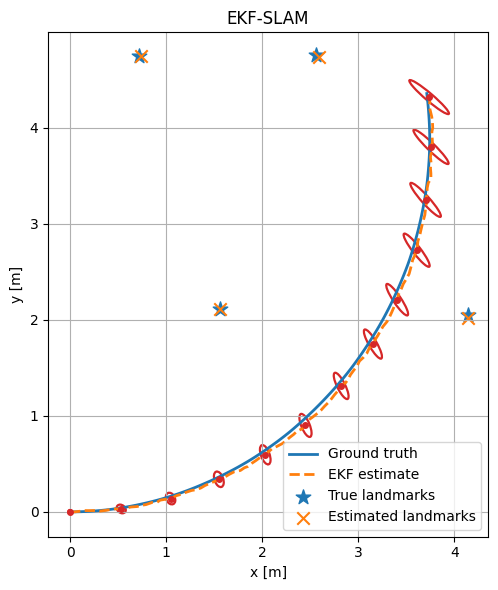

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

# --- Sampling & plotting utils --
def sample_landmarks(N:int, lo:np.ndarray, hi:np.ndarray, min_dist:float, seed:int=None) -> np.ndarray:
    """
    Sample N landmark positions uniformly in [lo, hi]x[lo, hi],
    ensuring they are at least min_dist from the origin.
    Args:
        N (int): number of landmarks
        lo (np.ndarray): lower bound (2,)
        hi (np.ndarray): upper bound (2,)
        min_dist (float): minimum distance from origin
        seed (int, optional): random seed. Defaults to None.
    Returns:
        L (np.ndarray): (N,2) landmark positions
    """
    rng = np.random.default_rng(seed)
    L = rng.uniform(low=lo, high=hi, size=(N, 2))
    mask = np.linalg.norm(L, axis=1) > min_dist
    while not np.all(mask):
        L[~mask] = rng.uniform(low=lo, high=hi, size=(np.sum(~mask), 2))
        mask = np.linalg.norm(L, axis=1) > min_dist
    return L

def circular_trajectory_controls(T:int, speed:np.ndarray) -> list:
    """
    Generate a list of (v,w) controls to follow a circular trajectory.
    Args:
        T (int): number of time steps
        speed (np.ndarray): nominal (v,w) speeds
    Returns:
        list: list of (v,w) controls for T steps
    """
    v, w = float(speed[0]), float(speed[1])
    return [np.array([v, w]) for _ in range(T)]

# --- Full example (prediction + correction) ---
cfg = SimpleNamespace(
    seed          = 1,                         # set to None for nondeterministic runs
    N_landmarks   = 4,                         # number of landmarks
    lm_bounds_lo  = np.array([ 0.0, 0.0]),     # lower bounds for landmark sampling
    lm_bounds_hi  = np.array([ 5.0, 5.0]),     # upper bounds for landmark sampling
    lm_min_dist   = 0.5,                       # minimum distance of landmarks from origin
    dt            = 0.10,                      # time step [s]                  
    T             = 120,                       # number of steps
    u_nom         = np.array([0.50, 0.15]),    # EKF prediction controls
    R_x           = np.diag([0.01**2, 0.01**2, # EKF process noise on [x, y, theta]
                            (1.0*np.pi/180)**2]),
    Q             = np.diag([0.02**2,          # EKF observation noise on [r, phi]
                            (2.0*np.pi/180)**2]),
    bias_v        = 1.07,                      # GT speed bias multiplier
    bias_w        = 0.96,                      # GT turn-rate bias multiplier
    R_exec        = np.diag([0.02**2,          # GT control noise on [v, w]
                            (2.0*np.pi/180)**2]),
    Sigma0_pose   = np.diag([1e-4, 1e-4,       # initial pose covariance
                            (1*np.pi/180)**2]),
    Sigma0_lm_var = 1e6,                       # initial landmark variance (large = uninformative)
    ellipse_steps = np.arange(0, 121, 10),     # which steps to draw ellipses; None -> auto
)

# --- Full EKF-SLAM rollout ---
def run_full_stack(cfg):
    # Landmarks & controls
    L_true = sample_landmarks(cfg.N_landmarks, cfg.lm_bounds_lo, cfg.lm_bounds_hi, cfg.lm_min_dist, seed=cfg.seed)
    u_seq  = circular_trajectory_controls(cfg.T, cfg.u_nom)

    # Initial belief
    n = 3 + 2*cfg.N_landmarks
    mu    = np.zeros(n)
    Sigma = np.block([
        [cfg.Sigma0_pose, np.zeros((3, 2*cfg.N_landmarks))],
        [np.zeros((2*cfg.N_landmarks, 3)), np.eye(2*cfg.N_landmarks)*cfg.Sigma0_lm_var]
    ])
    seen = np.zeros(cfg.N_landmarks, dtype=bool)

    # Ground truth
    x_gt = np.zeros(3)

    # Logs
    MU_hist, GT_hist = [mu.copy()], [x_gt.copy()]
    Ppose_hist = [Sigma[:3,:3].copy()]

    rng = np.random.default_rng(cfg.seed)
    for k in range(cfg.T):
        # --- GT executes biased + noisy controls
        noise  = rng.multivariate_normal([0,0], cfg.R_exec)
        u_exec = np.array([cfg.bias_v*cfg.u_nom[0], cfg.bias_w*cfg.u_nom[1]]) + noise
        x_gt[:3] = x_gt[:3] + motion_increment(x_gt[2], u_exec, cfg.dt)
        x_gt[2]  = wrap_angle(x_gt[2])

        # --- Prediction ---
        mu_bar, Sigma_bar = EKF_SLAM_Prediction(mu, Sigma, u_seq[k], cfg.R_x, cfg.dt)

        # --- Measurements (all landmarks, known associations)
        z_all, c_all = [], []
        for j in range(cfg.N_landmarks):
            dx, dy = L_true[j,0] - x_gt[0], L_true[j,1] - x_gt[1]
            r      = np.hypot(dx, dy)
            phi    = wrap_angle(np.arctan2(dy, dx) - x_gt[2])
            z = np.array([
                r   + rng.normal(0.0, np.sqrt(cfg.Q[0,0])),
                wrap_angle(phi + rng.normal(0.0, np.sqrt(cfg.Q[1,1])))
            ])
            z_all.append(z); c_all.append(j)

        # --- Correction ---
        mu, Sigma, seen = EKF_SLAM_Correction(
            mu_bar, Sigma_bar, z_all, c_all, cfg.Q, seen)

        # --- Log ---
        MU_hist.append(mu.copy()); GT_hist.append(x_gt.copy())
        Ppose_hist.append(Sigma[:3,:3].copy())

    return np.vstack(MU_hist), np.vstack(GT_hist), Ppose_hist, L_true

# --- Run & plot ---
MU_hist, GT_hist, Ppose_hist, L_true = run_full_stack(cfg)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Trajectories + ellipses
ax.plot(GT_hist[:,0], GT_hist[:,1], '-',  lw=2, label='Ground truth')
ax.plot(MU_hist[:,0], MU_hist[:,1], '--', lw=2, label='EKF estimate')
for s in cfg.ellipse_steps:
    plot_ellipse(ax, MU_hist[s], Ppose_hist[s], nsig=2, color='tab:red', lw=1.6)
    ax.plot(MU_hist[s,0], MU_hist[s,1], 'o', color='tab:red', ms=4)
ax.scatter(L_true[:,0], L_true[:,1], marker='*', s=120, label='True landmarks')
estL = MU_hist[-1, 3:].reshape(-1, 2)
ax.scatter(estL[:,0], estL[:,1], marker='x', s=80, label='Estimated landmarks')
ax.set_aspect('equal', adjustable='box')
ax.grid(True); ax.set_xlabel('x [m]'); ax.set_ylabel('y [m]')
ax.set_title(f'EKF-SLAM')
ax.legend(loc='best')

plt.tight_layout(); plt.show()


---


### 🗂️ <span style="color:#a4d4a3">**EKF SLAM Algorithm** (Summary)</span>

Having completed both steps we can summarize the full <span style="color:#ffa500">**EKF SLAM Algorithm**</span> as follows:

> <tt> <span style="color:#FF2DD1">1.</span> <span style="color:#4D96FF">def</span> **<span style="color:#6BCB77">EKF_SLAM_Prediction</span>($\color{#ffa500}\mu_{t-1}$, $\color{#ffa500}\Sigma_{t-1}$, $\color{#ffa500}u_t$, $\color{#ffa500}z_t$, $\color{#ffa500}c_t$, $\color{#ffa500}R_t$):**
>>
>><span style="color:#FF2DD1">2.</span> $F_x =  
\begin{pmatrix} 
1 & 0 & 0 & 0 \, \ldots \, 0 \\ 
0 & 1 & 0 & 0 \, \ldots \, 0 \\ 
0 & 0 & 1 & 0 \, \ldots \, 0 \\ 
\end{pmatrix}\,\,\,\,$ <span style="color:#948979"># Define low-to-high mapping</span>
>>
>><span style="color:#FF2DD1">3.</span> $\bar{\mu}_t = \bar{\mu}_{t-1} + F_x^T
\begin{pmatrix}
-\frac{v_t}{w_t}\sin \mu_{t-1,\theta} + \frac{v_t}{w_t}\sin(\mu_{t-1,\theta} + w_t\Delta t) \\[6pt]
\frac{v_t}{w_t}\cos \mu_{t-1,\theta} - \frac{v_t}{w_t}\cos(\mu_{t-1,\theta} + w_t\Delta t) \\[6pt]
w_t\Delta t
\end{pmatrix}\,\,\,\,$ <span style="color:#948979"># Predict the mean</span>
>>
>><span style="color:#FF2DD1">4.</span> $G_t = I + F_x^T 
\begin{pmatrix}
0 & 0 & -\frac{v_t}{w_t}\cos \mu_{t-1,\theta} + \frac{v_t}{w_t}\cos(\mu_{t-1,\theta} + w_t\Delta t) \\[6pt]
0 & 0 & -\frac{v_t}{w_t}\sin \mu_{t-1,\theta} + \frac{v_t}{w_t}\sin(\mu_{t-1,\theta} + w_t\Delta t) \\[6pt]
0 & 0 & 0
\end{pmatrix} F_x\,\,\,\,$ <span style="color:#948979"># Compute the Jacobian</span>
>>
>><span style="color:#FF2DD1">5.</span> $\bar{\Sigma}_t = G_t \Sigma_{t-1} G_t^T + \underbrace{F_x^T R_t^x F_x}_{R_t} \,\,\,\,$ <span style="color:#948979"># Predict the covariance</span>
>>
>><span style="color:#FF2DD1">6.</span> <span style="color:#e74c3c">return</span> $\bar{\mu}_t,\,\bar{\Sigma}_t$
>
><span style="color:#FF2DD1">7.</span> <span style="color:#4D96FF">def</span> **<span style="color:#6BCB77">EKF_SLAM_Correction</span>($\color{#ffa500}\bar{\mu}_t$, $\color{#ffa500}\bar{\Sigma}_t$, $\color{#ffa500}u_t$, $\color{#ffa500}z_t$, $\color{#ffa500}c_t$, $\color{#ffa500}\sigma_t$):**
>>
>><span style="color:#FF2DD1">8.</span> $Q_t = \begin{pmatrix} \sigma_r^2 & 0 \\ 0 & \sigma_\phi^2 \\ \end{pmatrix} \,\,\,\,$ <span style="color:#948979"># Define uncertainty of sensor</span>
>>
>><span style="color:#FF2DD1">9.</span> <span style="color:#e74c3c">for all</span> <span style="color:#ffa500">observed features</span> $z_t^i = (r_t^i,\phi_t^i)^T$ <span style="color:#e74c3c">do</span>:
>>
>>><span style="color:#FF2DD1">10.</span> $j = c_t^i\,\,\,\,$ <span style="color:#948979"># Index of the feature</span>
>>>
>>><span style="color:#FF2DD1">11.</span> <span style="color:#e74c3c">if</span> <span style="color:#ffa500">landmark</span> $j$ <span style="color:#e74c3c"> never seen before</span>:
>>>>
>>>><span style="color:#FF2DD1">12.</span> $\begin{pmatrix} \bar{\mu}_{j,x} \\[6pt] \bar{\mu}_{j,y} \end{pmatrix} = \begin{pmatrix} \bar{\mu}_{t,x} \\[6pt] \bar{\mu}_{t,y}\end{pmatrix} + \begin{pmatrix} r_t^i \cos(\varphi_t^i + \bar{\mu}_{t,\theta}) \\[6pt] r_t^i \sin(\varphi_t^i + \bar{\mu}_{t,\theta}) \end{pmatrix}\,\,\,\,$ <span style="color:#948979"># Initialize landmarks based on the robot's pose</span>
>>>>
>>><span style="color:#FF2DD1">13.</span> <span style="color:#e74c3c">endif</span>
>>>
>>><span style="color:#FF2DD1">14.</span> $\delta = \begin{pmatrix} \delta_x \\[6pt] \delta_y \end{pmatrix} = \begin{pmatrix} \bar{\mu}_{j,x} - \bar{\mu}_{t,x} \\[6pt] \bar{\mu}_{j,y} - \bar{\mu}_{t,y} \end{pmatrix}\,\,\,\,$ <span style="color:#948979"># Compute distance to landmark</span>
>>>
>>><span style="color:#FF2DD1">15.</span> $q = \delta^T \delta\,\,\,\,$ <span style="color:#948979"># Squared Euclidean distance</span>
>>>
>>><span style="color:#FF2DD1">16.</span> $\hat{z}_t^i = \begin{pmatrix} \sqrt{q} \\[6pt] \text{atan2}(\delta_y,\delta_x) - \bar{\mu}_{t,\theta} \end{pmatrix}\,\,\,\,$ <span style="color:#948979"># Compute predicted observation</span>
>>>
>>><span style="color:#FF2DD1">17.</span> $F_{x,j} = \begin{pmatrix} 1 & 0 & 0 & 0 \, \dots \, 0 & 0 & 0 & 0 \, \ldots \, 0 \\[3pt] 0 & 1 & 0 & 0 \, \dots \, 0 & 0 & 0 & 0 \, \ldots \, 0 \\[3pt] 0 & 0 & 1 & 0 \, \dots \, 0 & 0 & 0 & 0 \, \ldots \, 0 \\[3pt] 0 & 0 & 0 & 0 \, \dots \, 0 & 1 & 0 & 0 \, \ldots \, 0 \\[3pt] 0 & 0 & 0 & \underbrace{0 \, \dots \, 0}_{2j-2} & 0 & 1 & \underbrace{0 \, \ldots \, 0}_{2N-2j} \\[3pt] \end{pmatrix}\,\,\,\,$ <span style="color:#948979"># Define low-to-high mapping</span>
>>>
>>><span style="color:#FF2DD1">18.</span> $H_t^{i} = \frac{1}{q} \begin{pmatrix} -\sqrt{q}\,\delta_x & -\sqrt{q}\,\delta_y & 0 & \sqrt{q}\,\delta_x & \sqrt{q}\,\delta_y \\[6pt] \delta_y & -\delta_x & -q & -\delta_y & \delta_x \end{pmatrix} F_{x,j} \,\,\,\,$ <span style="color:#948979"># Compute Jacobian of observation</span>
>>>
>>><span style="color:#FF2DD1">19.</span> $K_t^i = \bar{\Sigma}_t \, H_t^{iT} \,(H_t^i \, \bar{\Sigma}_t \, H_t^{iT} + Q_t) ^{-1}\,\,\,\,$ <span style="color:#948979"># Compute Kalman Gain</span>
>>>
>>><span style="color:#FF2DD1">20.</span> $\bar{\mu}_t = \bar{\mu}_t + K_t^i(z_t^i - \hat{z_t}^i)\,\,\,\,$ <span style="color:#948979"># Update the mean</span>
>>>
>>><span style="color:#FF2DD1">21.</span> $\bar{\Sigma}_t = (I - K_t^i \, H_t^i) \, \bar{\Sigma}_t\,\,\,\,$ <span style="color:#948979"># Update the covariance</span>
>>>
>><span style="color:#FF2DD1">22.</span> <span style="color:#e74c3c">endfor</span>
>>
>><span style="color:#FF2DD1">23.</span> $\mu_t = \bar{\mu}_t\,\,\,\,$ 
>>
>><span style="color:#FF2DD1">24.</span> $\Sigma_t = \bar{\Sigma}_t\,\,\,\,$
>>
>><span style="color:#FF2DD1">25.</span> <span style="color:#e74c3c">return</span> $\mu_t, \Sigma_t\,\,\,\,$
</tt>


#### 👩🏻‍💻 <span style="color:#a4d4a3">**Implementation Notes**</span>

When implementing the full <span style="color:#ffa500">**EKF-SLAM**</span> algorithm, keep the following in mind:

- <span style="color:#00703c">**Batch updates:**</span> Always integrate all measurements from a single time step into <span style="color:#ffa500">**one complete update cycle**</span>.  
- <span style="color:#00703c">**Angle normalization:**</span> Ensure angular components are wrapped to remain within $[-\pi, \pi]$.  
- <span style="color:#00703c">**Jacobian efficiency:**</span> Avoid explicitly forming the $F_{x,j}$ matrices unless necessary, use <span style="color:#ffa500">**indexing operations**</span> instead for better efficiency.  

In the following example, we revisit the <span style="color:#ffa500">**Pygame simulation**</span> introduced earlier (during the motion-model section), where the trajectory and map drifted considerably due to noise and model inaccuracies. This time, we extend it with the EKF update step.

Some practical implementation details are worth noting:

1. <span style="color:#00703c">**Landmark density:**</span> Since we are not extracting high-level features but instead treating every LiDAR point as a potential landmark, the state vector can grow very quickly, creating computational bottlenecks. To manage this, we <span style="color:#ffa500">**discretize the 2D LiDAR image plane into pixel blocks**</span>, keeping only one landmark per block. This reduces the total number of landmarks significantly.  

2. <span style="color:#00703c">**Selective updates:** </span>Updating the entire state vector with all landmarks at every step is computationally expensive. Instead, we only update the <span style="color:#ffa500">**nearest subset of landmarks**</span>. This keeps the updates efficient while still correcting the map consistently as landmarks are revisited.  

3. <span style="color:#00703c">**Consistency:**</span> As a result of these strategies, the reconstructed map becomes noticeably more stable.  
   Depending on how many neighbors are selected, you can directly see how the nearest landmarks are corrected and reinforced over multiple observations.  

Finally, as the system grows in size and complexity, structuring the code with dedicated <span style="color:#ffa500">**classes**</span> and <span style="color:#ffa500">**functions**</span> becomes essential for clarity and maintainability.  


In [1]:
# ===========================================
# EKF-SLAM Pygame Demo (GT left | EKF right)
# ===========================================

import sys
import numpy as np
import pygame

# --- Small helpers ---
def wrap_angle(a: float) -> float:
    return (a + np.pi) % (2*np.pi) - np.pi

def i2(p):
    """(x,y) -> (int,int)"""
    return (int(p[0]), int(p[1]))

# --- Config ---
class Config:
    # Window/panels
    panel_w, panel_h = 600, 400
    window_size = (panel_w*2, panel_h)

    # Scan/visual
    num_beams = 180
    scan_ms   = 100
    fov_deg   = 360
    ray_stride = 2
    traj_max   = 200

    # Discretization (to limit LMs)
    grid_px = 8           # one LM per grid cell
    range_step_px = 4.0   # quantize range
    bearing_step_deg = 2.0
    bearing_step = np.deg2rad(bearing_step_deg)

    # Landmark selection
    use_nearest = True
    nearest_k_seen = 25
    chunk = None          # None or e.g. 24

    # Motion (keyboard odometry)
    trans_step = 10.0
    rot_step   = np.deg2rad(15.0)

    # Noises (pixels & radians)
    R_x = np.diag([1.0**2, 1.0**2, (2.0*np.pi/180.0)**2]).astype(np.float32)  # process (pose)
    Q   = np.diag([2.0**2, (2.0*np.pi/180.0)**2]).astype(np.float32)          # sensor (range px, bearing rad)

# --- Panel (drawing with offset) ---
class Panel:
    def __init__(self, screen, rect):
        self.screen = screen
        self.rect   = rect     # (x,y,w,h)

    @property
    def ox(self): return self.rect[0]

    def clear(self, color):
        x,y,w,h = self.rect
        self.screen.fill(color, self.rect)
        pygame.draw.rect(self.screen, (200,200,200), self.rect, 2)

    def blit(self, surf, at=(0,0)):
        x,y,_,_ = self.rect
        self.screen.blit(surf, (x+at[0], y+at[1]))

    def line(self, color, p0, p1, width=1):
        x,y,_,_ = self.rect
        self.screen.draw_line = pygame.draw.line
        pygame.draw.line(self.screen, color, (x+p0[0], y+p0[1]), (x+p1[0], y+p1[1]), width)

    def circle(self, color, p, r):
        x,y,_,_ = self.rect
        pygame.draw.circle(self.screen, color, (x+int(p[0]), y+int(p[1])), r)

    def polygon(self, color, pts):
        x,y,_,_ = self.rect
        P = [(x+int(px), y+int(py)) for (px,py) in pts]
        pygame.draw.polygon(self.screen, color, P)

    def text(self, font, s, color, pos):
        x,y,_,_ = self.rect
        self.screen.blit(font.render(s, True, color), (x+pos[0], y+pos[1]))

# --- Map / occupancy ---
class Map2D:
    def __init__(self, cfg: Config, floor_img_path='../figures/floor_plan.png'):
        self.cfg = cfg
        self.surface = pygame.transform.smoothscale(
            pygame.image.load(floor_img_path), (cfg.panel_w, cfg.panel_h)
        )
        arr = pygame.surfarray.array3d(self.surface)  # (w,h,3)
        self.wall_mask = np.all(arr < 128, axis=2).astype(np.bool_)  # True=wall

    def cast_beam_fast(self, pos_xy, angle, max_r):
        W, H = self.wall_mask.shape
        x0, y0 = float(pos_xy[0]), float(pos_xy[1])
        c, s = np.cos(angle), np.sin(angle)
        for d in range(0, int(max_r), self.cfg.ray_stride):
            x = int(x0 + d*c); y = int(y0 + d*s)
            if not (0 <= x < W and 0 <= y < H):  # left/top clipped by panel bounds
                return None, d
            if self.wall_mask[x, y]:
                return (x, y), d
        return None, int(max_r)

# --- LiDAR (ID per grid cell) ---
class Lidar:
    def __init__(self, cfg: Config, world_map: Map2D):
        self.cfg = cfg
        self.map = world_map
        self.id_by_cell = {}   # (cx,cy) -> lm_id
        self.cell_by_id = []   # list indexed by lm_id: (cx,cy)

    def cell_of_xy(self, x: float, y: float):
        return (int(x)//self.cfg.grid_px, int(y)//self.cfg.grid_px)

    def cell_center_xy(self, cell):
        cx, cy = cell
        g = self.cfg.grid_px
        return (cx*g + 0.5*g, cy*g + 0.5*g)

    def quantize_meas(self, r: float, phi: float):
        rq = self.cfg.range_step_px * round(r / self.cfg.range_step_px)
        pq = wrap_angle(self.cfg.bearing_step * round(phi / self.cfg.bearing_step))
        return rq, pq

    def ensure_id(self, cell):
        if cell not in self.id_by_cell:
            lm_id = len(self.cell_by_id)
            self.id_by_cell[cell] = lm_id
            self.cell_by_id.append(cell)
        return self.id_by_cell[cell]

    def scan(self, gt_pose, heading, rng, max_range_px=200):
        fov = np.deg2rad(self.cfg.fov_deg)
        angles = (heading + np.linspace(-fov/2, fov/2, self.cfg.num_beams, endpoint=False)) % (2*np.pi)

        z_all, c_all = [], []
        used_cells = set()
        for a in angles:
            hit, dist = self.map.cast_beam_fast(gt_pose[:2], a, max_range_px)
            if not hit:
                continue
            hx, hy = hit
            cell = self.cell_of_xy(hx, hy)
            if cell in used_cells:
                continue
            used_cells.add(cell)

            j = self.ensure_id(cell)

            # noisy (r,phi) relative to GT, quantized
            true_phi = wrap_angle(a - float(gt_pose[2]))
            r_meas   = dist  + rng.normal(0.0, np.sqrt(float(self.cfg.Q[0,0])))
            phi_meas = wrap_angle(true_phi + rng.normal(0.0, np.sqrt(float(self.cfg.Q[1,1]))))
            r_q, phi_q = self.quantize_meas(r_meas, phi_meas)

            z_all.append(np.array([r_q, phi_q], dtype=np.float32))
            c_all.append(j)

        return z_all, c_all

# --- EKF-SLAM (odometry + range/bearing) ---
class EKFSLAM:
    def __init__(self, cfg: Config):
        self.cfg = cfg
        self.mu    = None          # [x,y,th, m1x,m1y, ...]
        self.Sigma = None
        self.seen  = None

    # --- state sizing ---
    def ensure_state_size(self, N: int, init_pose=None):
        req_n = 3 + 2*N
        if self.mu is None:
            self.mu = np.zeros(req_n, dtype=np.float32)
            if init_pose is not None:
                self.mu[:3] = init_pose
            self.Sigma = np.block([
                [np.diag([1e-6, 1e-6, (1*np.pi/180.0)**2]).astype(np.float32), np.zeros((3, 2*N), dtype=np.float32)],
                [np.zeros((2*N, 3), dtype=np.float32), np.eye(2*N, dtype=np.float32)*1e6]
            ])
            self.seen = np.zeros(N, dtype=bool)
            return
        currN = (self.mu.size - 3)//2
        if N > currN:
            addN = N - currN
            self.mu = np.hstack([self.mu, np.zeros(2*addN, dtype=np.float32)])
            top = np.hstack([self.Sigma, np.zeros((3+2*currN, 2*addN), dtype=np.float32)])
            bot = np.hstack([np.zeros((2*addN, 3+2*currN), dtype=np.float32), np.eye(2*addN, dtype=np.float32)*1e6])
            self.Sigma = np.vstack([top, bot])
            self.seen = np.hstack([self.seen, np.zeros(addN, dtype=bool)])

    def ensure_state(self, lidar: Lidar, init_pose=None):
        self.ensure_state_size(len(lidar.cell_by_id), init_pose=init_pose)

    # --- motion (odometry) ---
    @staticmethod
    def motion_model_odometry(u, x_prev):
        dr1, dt, dr2 = u
        x_new = x_prev[0] + dt*np.cos(x_prev[2] + dr1)
        y_new = x_prev[1] + dt*np.sin(x_prev[2] + dr1)
        th_new= wrap_angle(x_prev[2] + dr1 + dr2)
        return np.array([x_new, y_new, th_new], dtype=np.float32)

    @staticmethod
    def G_inner_odometry(th, u):
        dr1, dt, _ = u
        c = np.cos(th + dr1); s = np.sin(th + dr1)
        return np.array([[0,0,-dt*s],[0,0,dt*c],[0,0,0]], dtype=np.float32)

    def predict(self, u):
        mu_pred = self.mu.copy()
        mu_pred[:3] = self.motion_model_odometry(u, self.mu[:3])
        mu_pred[2]  = wrap_angle(float(mu_pred[2]))

        Σ_xx = self.Sigma[:3,:3]
        Σ_xm = self.Sigma[:3,3:]
        Gx = np.eye(3, dtype=np.float32) + self.G_inner_odometry(float(self.mu[2]), u)

        Σ_xx_new = Gx @ Σ_xx @ Gx.T + self.cfg.R_x
        Σ_xm_new = Gx @ Σ_xm

        Sigma_pred = self.Sigma.copy()
        Sigma_pred[:3,:3] = Σ_xx_new
        Sigma_pred[:3,3:] = Σ_xm_new
        Sigma_pred[3:,:3] = Σ_xm_new.T

        self.mu, self.Sigma = mu_pred, Sigma_pred

    # --- observation / correction ---
    @staticmethod
    def innovation(z, zhat):
        return np.array([float(z[0]) - float(zhat[0]), wrap_angle(float(z[1]) - float(zhat[1]))], dtype=np.float32)

    def expected_observation(self, j):
        x,y,th = float(self.mu[0]), float(self.mu[1]), float(self.mu[2])
        mx,my  = float(self.mu[3+2*j]), float(self.mu[3+2*j+1])
        dx,dy  = mx-x, my-y
        q      = dx*dx + dy*dy
        r      = np.sqrt(max(q, 1e-12))
        phi    = wrap_angle(np.arctan2(dy,dx) - th)
        return np.array([r,phi], dtype=np.float32), np.array([dx,dy], dtype=np.float32), float(q)

    def init_landmark_at_xy(self, j, xy):
        if not self.seen[j]:
            self.mu[3+2*j]   = float(xy[0])
            self.mu[3+2*j+1] = float(xy[1])
            self.seen[j] = True

    def correct_batch(self, z_list, c_list, lidar: Lidar):
        n = self.mu.size
        I = np.eye(n, dtype=np.float32)

        M = len(z_list)
        if M == 0: return

        # 1) init unseen LMs at cell centers
        for z, j in zip(z_list, c_list):
            if not self.seen[j]:
                cell = lidar.cell_by_id[j]
                cx,cy = lidar.cell_center_xy(cell)
                self.init_landmark_at_xy(j, (cx,cy))

        # 2) stack H, v
        H = np.zeros((2*M, n), dtype=np.float32)
        v = np.zeros(2*M, dtype=np.float32)
        for i, (z, j) in enumerate(zip(z_list, c_list)):
            zhat, delta, q = self.expected_observation(j)
            dx,dy = float(delta[0]), float(delta[1]); r = float(zhat[0]); q = max(q, 1e-12)
            Hs = (1.0/q) * np.array([
                [-r*dx,  -r*dy,   0.0,  r*dx,  r*dy],
                [  dy,    -dx,   -q,    -dy,    dx]
            ], dtype=np.float32)
            r0 = 2*i
            H[r0:r0+2, 0:3] = Hs[:,0:3]
            cj = 3 + 2*j
            H[r0:r0+2, cj:cj+2] = Hs[:,3:5]
            v[r0:r0+2] = self.innovation(z, zhat)

        R = np.kron(np.eye(M, dtype=np.float32), self.cfg.Q.astype(np.float32))
        S = H @ self.Sigma @ H.T + R
        V = self.Sigma @ H.T
        X = np.linalg.solve(S, V.T).T
        self.mu = self.mu + X @ v
        self.mu[2] = wrap_angle(float(self.mu[2]))
        self.Sigma = (I - X @ H) @ self.Sigma

    # nearest-K seen for load shedding
    def select_nearest_seen(self, max_k):
        ids = np.where(self.seen)[0]
        if ids.size == 0: return ids
        robot_xy = self.mu[:2].astype(np.float32)
        L = self.mu[3:].reshape(-1,2).astype(np.float32)[ids]
        d = np.linalg.norm(L - robot_xy[None,:], axis=1)
        order = np.argsort(d)
        return ids[order[:min(max_k, ids.size)]]

# --- App ---
class App:
    def __init__(self, cfg: Config):
        pygame.init()
        self.cfg = cfg
        self.screen = pygame.display.set_mode(cfg.window_size)
        pygame.display.set_caption("GT (left) | EKF-SLAM (right)")
        self.clock = pygame.time.Clock()
        self.font  = pygame.font.SysFont(None, 18)

        # Panels (right panel uses a Panel wrapper that offsets drawing)
        self.left  = Panel(self.screen, (0, 0, cfg.panel_w, cfg.panel_h))
        self.right = Panel(self.screen, (cfg.panel_w, 0, cfg.panel_w, cfg.panel_h))

        # Map + lidar
        self.map = Map2D(cfg)
        self.lidar = Lidar(cfg, self.map)

        # GT / EKF
        self.gt_pose = np.array([cfg.panel_w//2, cfg.panel_h//2, 0.0], dtype=np.float32)
        self.gt_traj = [self.gt_pose.copy()]

        self.ekf = EKFSLAM(cfg)
        self.ekf.ensure_state(self.lidar, init_pose=self.gt_pose)  # start aligned

        self.ekf_traj = []

        # beam sweep
        self.beam_speed = 2*np.pi*10
        self.beam_angle = 0.0
        self.max_range_px = 200

        # timer
        self.SCAN_EVENT = pygame.USEREVENT + 1
        pygame.time.set_timer(self.SCAN_EVENT, cfg.scan_ms)

        self.rng = np.random.default_rng(0)

    # --- input / steps ---
    def step_motion(self, cmd):
        # GT
        self.gt_pose = self.ekf.motion_model_odometry(cmd, self.gt_pose)
        self.gt_traj.append(self.gt_pose.copy()); self.gt_traj = self.gt_traj[-self.cfg.traj_max:]

        # EKF predict
        self.ekf.ensure_state(self.lidar)  # keep consistent
        self.ekf.predict(cmd)
        self.ekf_traj.append(self.ekf.mu[:3].copy()); self.ekf_traj = self.ekf_traj[-self.cfg.traj_max:]

    def step_scan(self):
        # heading (use EKF heading so FOV follows its estimate)
        heading = float(self.ekf.mu[2]) if self.ekf.mu is not None else float(self.gt_pose[2])
        z_all, c_all = self.lidar.scan(self.gt_pose, heading, self.rng, max_range_px=self.max_range_px)
        if not z_all:
            return

        # NEW: grow EKF after scan (new lm IDs may have appeared)
        self.ekf.ensure_state(self.lidar)

        # keep ALL unseen
        unseen = [(z,j) for z,j in zip(z_all, c_all) if not self.ekf.seen[j]]
        # optionally thin seen via nearest-K
        if self.cfg.use_nearest and np.any(self.ekf.seen):
            allowed = set(int(i) for i in self.ekf.select_nearest_seen(self.cfg.nearest_k_seen))
            seen_pairs = [(z,j) for z,j in zip(z_all, c_all) if (self.ekf.seen[j] and (j in allowed))]
        else:
            seen_pairs = [(z,j) for z,j in zip(z_all, c_all) if self.ekf.seen[j]]

        batch = unseen + seen_pairs
        if not batch: return

        if self.cfg.chunk is None:
            z_list, c_list = map(list, zip(*batch))
            self.ekf.correct_batch(z_list, c_list, self.lidar)
        else:
            for s in range(0, len(batch), self.cfg.chunk):
                z_chunk, c_chunk = map(list, zip(*batch[s:s+self.cfg.chunk]))
                self.ekf.correct_batch(z_chunk, c_chunk, self.lidar)

    # --- drawing ---
    def draw_left(self):
        self.left.clear((30,30,30))
        self.left.blit(self.map.surface, (0,0))

        # GT traj
        for i in range(1, len(self.gt_traj)):
            p0 = i2(self.gt_traj[i-1][:2]); p1 = i2(self.gt_traj[i][:2])
            pygame.draw.line(self.screen, (0,150,255),
                             (self.left.ox+p0[0], p0[1]), (self.left.ox+p1[0], p1[1]), 2)

        # GT robot (triangle)
        gx,gy,gth = map(float, self.gt_pose)
        pts = [
            (gx + 15*np.cos(gth),     gy + 15*np.sin(gth)),
            (gx + 10*np.cos(gth+2.5), gy + 10*np.sin(gth+2.5)),
            (gx + 10*np.cos(gth-2.5), gy + 10*np.sin(gth-2.5))
        ]
        self.left.polygon((0,150,255), pts)

        # rotating beam (on GT)
        bx,by = i2(self.gt_pose[:2])
        hit, dist = self.map.cast_beam_fast(self.gt_pose[:2], self.beam_angle, self.max_range_px)
        if hit:
            ex,ey = hit
        else:
            ex = int(bx + self.max_range_px*np.cos(self.beam_angle))
            ey = int(by + self.max_range_px*np.sin(self.beam_angle))
        pygame.draw.line(self.screen, (255,0,0),
                         (self.left.ox+bx, by), (self.left.ox+ex, ey), 2)

    def draw_right(self):
        # Everything drawn via Panel methods -> automatically centered to right panel
        self.right.clear((255,255,255))

        # EKF traj
        for i in range(1, len(self.ekf_traj)):
            p0 = i2(self.ekf_traj[i-1][:2]); p1 = i2(self.ekf_traj[i][:2])
            pygame.draw.line(self.screen, (200,200,60),
                             (self.right.ox+p0[0], p0[1]), (self.right.ox+p1[0], p1[1]), 2)

        # EKF robot
        if self.ekf.mu is not None:
            px,py,pth = map(float, self.ekf.mu[:3])
            self.right.circle((200,200,60), (px,py), 8)

        # EKF landmarks
        if (self.ekf.mu is not None) and (self.ekf.mu.size > 3):
            estL = self.ekf.mu[3:].reshape(-1,2)
            for (mx,my), seen in zip(estL, self.ekf.seen):
                color = (255,0,0) if seen else (180,180,180)
                self.right.circle(color, (mx,my), 2)

        # HUD
        fps = self.clock.get_fps()
        hud = (f"FPS:{fps:4.1f} | Beams:{self.cfg.num_beams} @ {1000//self.cfg.scan_ms}Hz | Grid:{self.cfg.grid_px}px | "
               f"Nearest-K:{'ON' if self.cfg.use_nearest else 'OFF'}({self.cfg.nearest_k_seen}) | "
               f"LMs:{len(self.lidar.cell_by_id)}")
        self.right.text(self.font, hud, (10,10,10), (10,10))

    # --- main loop ---
    def run(self):
        running = True
        while running:
            dt = self.clock.tick(30) / 1000.0
            self.beam_angle = (self.beam_angle + self.beam_speed*dt) % (2*np.pi)

            for ev in pygame.event.get():
                if ev.type == pygame.QUIT:
                    running = False

                elif ev.type == pygame.KEYDOWN:
                    if   ev.key == pygame.K_UP:    cmd = np.array([0.0, self.cfg.trans_step, 0.0], dtype=np.float32)
                    elif ev.key == pygame.K_LEFT:  cmd = np.array([-self.cfg.rot_step, 0.0, 0.0], dtype=np.float32)
                    elif ev.key == pygame.K_RIGHT: cmd = np.array([ self.cfg.rot_step, 0.0, 0.0], dtype=np.float32)
                    elif ev.key == pygame.K_n:     self.cfg.use_nearest = not self.cfg.use_nearest; cmd = None
                    else: cmd = None
                    if cmd is not None:
                        self.step_motion(cmd)

                elif ev.type == self.SCAN_EVENT:
                    self.step_scan()

            # Draw
            self.draw_left()
            self.draw_right()
            pygame.display.flip()

        pygame.quit()
        sys.exit()

# -------------------- Run --------------------
if __name__ == "__main__":
    cfg = Config()
    App(cfg).run()


pygame 2.6.1 (SDL 2.28.4, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

/home/niksta/Documents/Projects/a-brief-slam-summary/slam/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


---

### 🌱 <span style="color:#a4d4a3">**What's next?**</span>

While the **Extended Kalman Filter (EKF)** improved upon the standard **Kalman Filter (KF)** by handling non-linear models, there are still limitations.  
We briefly introduce the **Unscented Kalman Filter (UKF)** as an alternative.

<span style="color:#00703c">**KF vs. EKF**</span>

- EKF is an extension of the KF.  
- Designed to handle non-linearities.  
- Performs <span style="color:#ffa500">**local linearizations**</span> around the current estimate.  
- Works well in practice for <span style="color:#ffa500">**moderate non-linearities**</span> and uncertainty.  

#### ✨ <span style="color:#a4d4a3">**Unscented Kalman Filter (UKF)**</span>

**Motivation**

- KF requires strictly <span style="color:#ffa500">**linear models**</span>.  
- EKF approximates non-linear functions with a <span style="color:#ffa500">**Taylor expansion**</span>.  

💡 *Is there a better way to deal with non-linear transformations?*  

The **UKF** avoids explicit Jacobians. Instead, it uses the **Unscented Transform**: it computes a set of carefully chosen <span style="color:#ffa500">**sigma points**</span>, propagates them through the non-linear motion and measurement models, and then reconstructs a Gaussian distribution from the transformed points.

<span style="color:#00703c">**UKF vs. EKF**</span>

- Produces the <span style="color:#ffa500">**same results as EKF**</span> for linear models.  
- Provides a <span style="color:#ffa500">**better approximation**</span> for non-linear models.  
- <span style="color:#ffa500">**No Jacobians**</span> are required.  
- Computational complexity is <span style="color:#ffa500">**similar**</span>, but UKF can be slightly slower.  

---


### 📚 <span style="color:#a4d4a3">**Reading Material**</span>

**EKF-SLAM**
- Thrun et al.: *"Probabilistic Robotics"*, **Chapter 10**

**Unscented Transform and UKF**
- Thrun et al.: *"Probabilistic Robotics"*, **Chapter 3.4**
